In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type(data.get("data"))

numpy.ndarray

In [32]:
path_credit = "/Users/greg/Downloads/AR_Master_Thesis/data/creditcard.csv"
data_credit = pd.read_csv(path_credit)


In [42]:
X = data_credit.iloc[:, 1:-1].to_numpy()
y = data_credit.iloc[:, -1].to_numpy()

In [46]:
X

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.91956501e+00, -3.01253846e-01, -3.24963981e+00, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [-2.40440050e-01,  5.30482513e-01,  7.02510230e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [-5.33412522e-01, -1.89733337e-01,  7.03337367e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [5]:
path_ILPD = "/Users/greg/Downloads/AR_Master_Thesis/data/ILPD_preprocessed.csv"
data_ILPD = pd.read_csv(path_ILPD)

In [22]:
data_ILPD

,Unnamed: 0,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,Albumin,Albumin and Globulin Ratio,Class
0,0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37,0
575,579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [29]:
data_ILPD.iloc[0:, 1:-1].to_numpy()

array([[65.  ,  1.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  0.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  0.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  0.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  0.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  0.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [23]:
path_HCC = "/Users/greg/Downloads/AR_Master_Thesis/data/HCC_preprocessed.csv"
data_HCC = pd.read_csv(path_HCC)

In [24]:
data_HCC

,Unnamed: 0,HCC,gender,AFP,AFP_L3,DCP,Age,Height,Weight
0,0,0,0,3.7,0.1,0.89,69.0,163.0,60.0
1,1,0,1,1.3,0.1,0.38,26.6,165.0,69.0
2,2,0,0,3.6,0.1,0.34,38.7,158.0,64.0
3,3,0,1,2.8,0.1,0.20,27.1,172.0,67.0
4,4,0,0,7.7,7.8,0.14,18.2,160.0,53.0
...,...,...,...,...,...,...,...,...,...
622,679,1,1,64.2,64.1,71738.85,71.2,184.0,68.0
623,680,1,1,609.8,21.8,941.90,66.4,170.0,95.0
624,681,1,1,142407.4,52.1,23201.54,67.4,178.0,60.0
625,682,1,1,59.4,70.9,404.80,61.4,166.0,85.0


In [75]:
n_db = 5
db_list = []
n_samples_per_db = int(len(data) / n_db)

In [76]:
# Create n databases
# sample size per databse = population size / no. of databases
for i in range(0, n_db):
    db_i = data.sample(n=n_samples_per_db, replace=False, random_state=1)
    db_list.append(db_i)
    data.drop(db_i.index)

In [77]:
len(db_list)

5

In [94]:
for i, db in enumerate(db_list): 
    # Print ratio p / n for each db. 
    print(
        f'The P/N Ratio of DB {i+1}: ',  
        db.target.value_counts()[1] / db.target.value_counts()[0]
        )


The P/N Ratio of DB 1:  1.6904761904761905
The P/N Ratio of DB 2:  1.6904761904761905
The P/N Ratio of DB 3:  1.6904761904761905
The P/N Ratio of DB 4:  1.6904761904761905
The P/N Ratio of DB 5:  1.6904761904761905


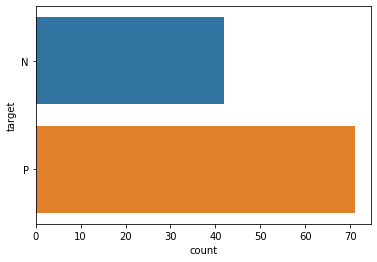

In [67]:
# db_list[0].target.describe()
# Check class balance after sampling with pandas. 
# The class balance barely changes after the simple sampling with pandas. 
g_ = sns.countplot(y=db_list[2].target)
g_.set_yticklabels(['N','P'])
plt.show()

'''
    Classes 2
    Samples per class: 212(M),357(B)
    Samples total: 569
    Dimensionality: 30
    Features: real, positive
'''

In [68]:
# Ratio P to N
357 / 212

1.6839622641509433

In [14]:
df = pd.DataFrame(dict(
    A=[1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    B=range(10)
))

In [25]:
df.sample(frac=0.2, replace=False, random_state=1)

,A,B,freq,weight
2,0,2,8,0.117647
9,0,9,8,0.117647


In [20]:
df['freq'] = df.groupby('A')['A'].transform('count')
df['weight'] = df.freq / sum(df.freq)
df

,A,B,freq,weight
0,1,0,2,0.029412
1,1,1,2,0.029412
2,0,2,8,0.117647
3,0,3,8,0.117647
4,0,4,8,0.117647
5,0,5,8,0.117647
6,0,6,8,0.117647
7,0,7,8,0.117647
8,0,8,8,0.117647
9,0,9,8,0.117647


1.0

In [22]:
sampledf = df.sample(n=5, weights = df.weight)

In [23]:
sampledf

,A,B,freq,weight
5,0,5,8,0.117647
9,0,9,8,0.117647
7,0,7,8,0.117647
2,0,2,8,0.117647
3,0,3,8,0.117647


In [24]:
df.drop(sampledf.index).sample(n=5, weights = df.freq)

,A,B,freq,weight
8,0,8,8,0.117647
6,0,6,8,0.117647
4,0,4,8,0.117647
0,1,0,2,0.029412
1,1,1,2,0.029412
